# Binary classification

## Exploring dollar bills
You will practice building classification models in Keras with the Banknote Authentication dataset.

Your goal is to distinguish between real and fake dollar bills. In order to do this, the dataset comes with 4 variables: variance,skewness,curtosis and entropy. These variables are calculated by applying mathematical operations over the dollar bill images. The labels are found in the class variable.


The dataset is pre-loaded in your workspace as banknotes, let's do some data exploration!

### init

In [1]:
#upload and download

from uploadfromdatacamp import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(banknotes)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'banknotes.csv': 'https://file.io/fHmR9K'}}
"""
prefix='data_from_datacamp/Chap2-Exercise1.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
banknotes = pd.read_csv(prefix+'banknotes.csv',index_col=0)



{pandas.core.frame.DataFrame: {"banknotes.csv": "https://file.io/fHmR9K"}}

{'pandas.core.frame.DataFrame': {'banknotes.csv': 'https://file.io/fHmR9K'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  8415    0  8415    0     0  11190      0 --:--:-- --:--:-- --:--:-- 11205


### code

In [4]:
import matplotlib.pyplot as plt

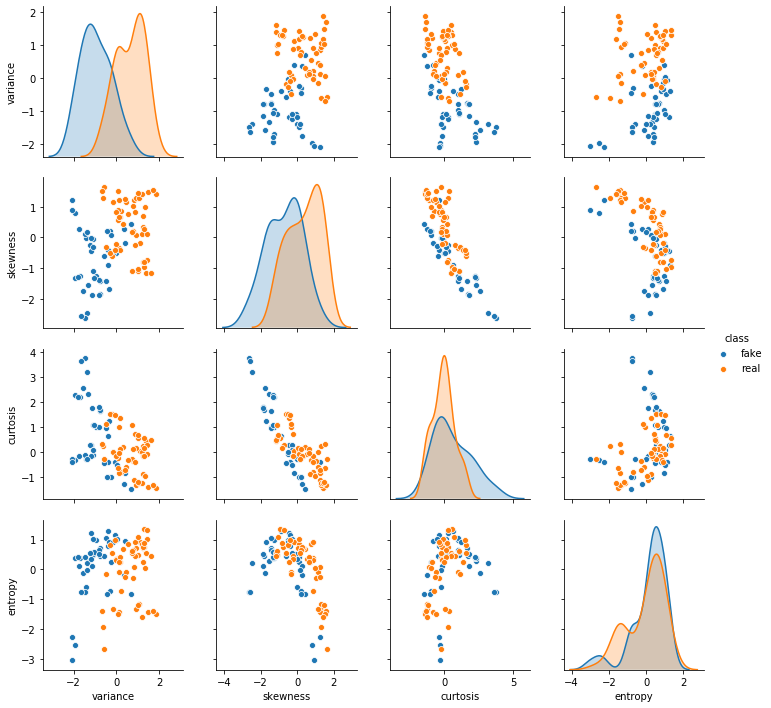

Dataset stats: 
         variance   skewness   curtosis    entropy
count  96.000000  96.000000  96.000000  96.000000
mean   -0.057791  -0.102829   0.230412   0.081497
std     1.044960   1.059236   1.128972   0.975565
min    -2.084590  -2.621646  -1.482300  -3.034187
25%    -0.839124  -0.916152  -0.415294  -0.262668
50%    -0.026748  -0.037559  -0.033603   0.394888
75%     0.871034   0.813601   0.978766   0.745212
max     1.869239   1.634072   3.759017   1.343345
Observations per class: 
 real    53
fake    43
Name: class, dtype: int64


In [5]:
# Import seaborn
import seaborn as sns

# Use pairplot and set the hue to be our class
sns.pairplot(banknotes, hue='class') 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations of each class
print('Observations per class: \n', banknotes['class'].value_counts())

## A binary classification model
Now that you know what the Banknote Authentication dataset looks like, we'll build a simple model to distinguish between real and fake bills.

You will perform binary classification by using a single neuron as an output. The input layer will have 4 neurons since we have 4 features in our dataset. The model output will be a value constrained between 0 and 1.

We will interpret this number as the probability of our input variables coming from a fake dollar bill, with 1 meaning we are certain it's fake.

### code

In [6]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


## Is this dollar bill fake ?
You are now ready to train your model and check how well it performs when classifying new bills! The dataset has already been partitioned as X_train, X_test,y_train and y_test.

### init

In [7]:
#upload and download

from uploadfromdatacamp import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(X_train, y_train, X_test, y_test)
"""

tobedownloaded="""
{numpy.ndarray: {'X_test.csv': 'https://file.io/DVXWIF',
  'X_train.csv': 'https://file.io/MnMhX3',
  'y_test.csv': 'https://file.io/p98Xak',
  'y_train.csv': 'https://file.io/lB6OLl'}}
"""
prefix='data_from_datacamp/Chap2-Exercise1.3_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

from uploadfromdatacamp import loadNDArrayFromCsv
X_train = loadNDArrayFromCsv(prefix+'X_train.csv')
X_test = loadNDArrayFromCsv(prefix+'X_test.csv')
y_train = loadNDArrayFromCsv(prefix+'y_train.csv')
y_test = loadNDArrayFromCsv(prefix+'y_test.csv')



{numpy.ndarray: {"X_test.csv": "https://file.io/DVXWIF",
  "X_train.csv": "https://file.io/MnMhX3",
  "y_test.csv": "https://file.io/p98Xak",
  "y_train.csv": "https://file.io/lB6OLl"}}

{'numpy.ndarray': {'X_test.csv': 'https://file.io/DVXWIF', 'X_train.csv': 'https://file.io/MnMhX3', 'y_test.csv': 'https://file.io/p98Xak', 'y_train.csv': 'https://file.io/lB6OLl'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15360    0 15360    0     0   5342      0 --:--:--  0:00:02 --:--:--  5342
100 32243    0 32243    0     0  11211      0 --:--:--  0:00:02 --:--:-- 11211
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Spe

### code

In [8]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs=20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:',accuracy)




Epoch 1/20





960/960 [==============================] - 0s 300us/step - loss: 0.8655 - acc: 0.4094
Epoch 2/20
960/960 [==============================] - 0s 30us/step - loss: 0.8158 - acc: 0.4625
Epoch 3/20
960/960 [==============================] - 0s 30us/step - loss: 0.7720 - acc: 0.5146
Epoch 4/20
960/960 [==============================] - 0s 31us/step - loss: 0.7334 - acc: 0.5458
Epoch 5/20
960/960 [==============================] - 0s 31us/step - loss: 0.6989 - acc: 0.5802
Epoch 6/20
960/960 [==============================] - 0s 30us/step - loss: 0.6682 - acc: 0.5906
Epoch 7/20
960/960 [==============================] - 0s 33us/step - loss: 0.6404 - acc: 0.6000
Epoch 8/20
960/960 [==============================] - 0s 33us/step - loss: 0.6153 - acc: 0.6146
Epoch 9/20
960/960 [==============================] - 0s 32us/step - loss: 0.5924 - acc: 0.6344
Epoch 10/20
960/960 [==============================] - 0s 31us/step - loss: 0.5715 - acc: 0.6469
Epoch 11/20
960/960 [=========

## A multi-class model
You're going to build a model that predicts who threw which dart only based on where that dart landed! (That is the dart's x and y coordinates.)

This problem is a multi-class classification problem since each dart can only be thrown by one of 4 competitors. So classes are mutually exclusive, and therefore we can build a neuron with as many output as competitors and use the softmax activation function to achieve a total sum of probabilities of 1 over all competitors.

Keras Sequential model and Dense layer are already loaded for you to use.

### code

In [1]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 132       
Total params: 10,852
Trainable params: 10,852
Non-trainable params: 0
_________________________________________________________________


## Prepare your dataset
In the console you can check that your labels, darts.competitor are not yet in a format to be understood by your network. They contain the names of the competitors as strings. You will first turn these competitors into unique numbers,then use the to_categorical() function from keras.utils to turn these numbers into their one-hot encoded representation.

This is useful for multi-class classification problems, since there are as many output neurons as classes and for every observation in our dataset we just want one of the neurons to be activated.

The dart's dataset is loaded as darts. Pandas is imported as pd. Let's prepare this dataset!

### init

In [4]:
#upload and download

from uploadfromdatacamp import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(darts)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'darts.csv': 'https://file.io/GfUaR9'}}
"""
prefix='data_from_datacamp/Chap2-Exercise1.5_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
darts = pd.read_csv(prefix+'darts.csv',index_col=0)


### code

In [5]:
import keras
import pandas as pd

In [6]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Print the label encoded competitors
print('Label encoded competitors: \n',darts.competitor.head())

Label encoded competitors: 
 0    2
1    3
2    1
3    0
4    2
Name: competitor, dtype: int8


In [7]:
# Import to_categorical from keras utils module
from keras.utils import to_categorical

# Use to_categorical on your labels
coordinates = darts.drop(['competitor'], axis=1)
competitors = to_categorical(darts.competitor)

# Now print the to_categorical() result
print('One-hot encoded competitors: \n',competitors)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


## Training on dart throwers
Your model is now ready, just as your dataset. It's time to train!

The coordinates and competitors variables you just transformed have been partitioned into coord_train,competitors_train, coord_test and competitors_test. Your model is also loaded. Feel free to visualize your training data or model.summary() in the console.

### init

In [8]:
#upload and download

from uploadfromdatacamp import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(coord_train, competitors_train, coord_test, competitors_test)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'coord_test.csv': 'https://file.io/sEhbzO',
  'coord_train.csv': 'https://file.io/JMKwDm'},
 numpy.ndarray: {'competitors_test.csv': 'https://file.io/coqrtC',
  'competitors_train.csv': 'https://file.io/FNOLXS'}}
"""
prefix='data_from_datacamp/Chap2-Exercise1.6_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
coord_test = pd.read_csv(prefix+'coord_test.csv',index_col=0)
coord_train = pd.read_csv(prefix+'coord_train.csv',index_col=0)
from uploadfromdatacamp import loadNDArrayFromCsv
competitors_test = loadNDArrayFromCsv(prefix+'competitors_test.csv')
competitors_train = loadNDArrayFromCsv(prefix+'competitors_train.csv')





{pandas.core.frame.DataFrame: {"coord_test.csv": "https://file.io/sEhbzO",
  "coord_train.csv": "https://file.io/JMKwDm"},
 numpy.ndarray: {"competitors_test.csv": "https://file.io/coqrtC",
  "competitors_train.csv": "https://file.io/FNOLXS"}}

{'pandas.core.frame.DataFrame': {'coord_test.csv': 'https://file.io/sEhbzO', 'coord_train.csv': 'https://file.io/JMKwDm'}, 'numpy.ndarray': {'competitors_test.csv': 'https://file.io/coqrtC', 'competitors_train.csv': 'https://file.io/FNOLXS'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6760    0  6760    0     0   9868      0 --:--:-- --:--:-- --:--:--  9883
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0    

### code

In [11]:
# Train your model on the training data for 200 epochs
model.fit(coord_train,competitors_train,epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/200





640/640 [==============================] - 1s 909us/step - loss: 1.3589 - acc: 0.2516
Epoch 2/200
640/640 [==============================] - 0s 80us/step - loss: 1.3129 - acc: 0.3156
Epoch 3/200
640/640 [==============================] - 0s 77us/step - loss: 1.2562 - acc: 0.3531
Epoch 4/200
640/640 [==============================] - 0s 72us/step - loss: 1.1838 - acc: 0.4141
Epoch 5/200
640/640 [==============================] - 0s 102us/step - loss: 1.0983 - acc: 0.5234
Epoch 6/200
640/640 [==============================] - 0s 75us/step - loss: 1.0160 - acc: 0.5781
Epoch 7/200
640/640 [==============================] - 0s 69us/step - loss: 0.9495 - acc: 0.5844
Epoch 8/200
640/640 [==============================] - 0s 73us/step - loss: 0.9011 - acc: 0.6078
Epoch 9/200
640/640 [==============================] - 0s 70us/step - loss: 0.8606 - acc: 0.6484
Epoch 10/200
640/640 [=

640/640 [==============================] - 0s 73us/step - loss: 0.6021 - acc: 0.8016
Epoch 62/200
640/640 [==============================] - 0s 74us/step - loss: 0.6025 - acc: 0.8047
Epoch 63/200
640/640 [==============================] - 0s 73us/step - loss: 0.6039 - acc: 0.7922
Epoch 64/200
640/640 [==============================] - 0s 74us/step - loss: 0.6000 - acc: 0.7859
Epoch 65/200
640/640 [==============================] - 0s 78us/step - loss: 0.6009 - acc: 0.8016
Epoch 66/200
640/640 [==============================] - 0s 67us/step - loss: 0.5942 - acc: 0.8000
Epoch 67/200
640/640 [==============================] - 0s 64us/step - loss: 0.5964 - acc: 0.7891
Epoch 68/200
640/640 [==============================] - 0s 61us/step - loss: 0.5946 - acc: 0.7891
Epoch 69/200
640/640 [==============================] - 0s 69us/step - loss: 0.5963 - acc: 0.7844
Epoch 70/200
640/640 [==============================] - 0s 67us/step - loss: 0.5944 - acc: 0.7984
Epoch 71/200
640/640 [===========

640/640 [==============================] - 0s 85us/step - loss: 0.5351 - acc: 0.7984
Epoch 145/200
640/640 [==============================] - 0s 77us/step - loss: 0.5240 - acc: 0.8094
Epoch 146/200
640/640 [==============================] - 0s 65us/step - loss: 0.5224 - acc: 0.8188
Epoch 147/200
640/640 [==============================] - 0s 66us/step - loss: 0.5159 - acc: 0.8062
Epoch 148/200
640/640 [==============================] - 0s 64us/step - loss: 0.5211 - acc: 0.8078
Epoch 149/200
640/640 [==============================] - 0s 62us/step - loss: 0.5217 - acc: 0.8031
Epoch 150/200
640/640 [==============================] - 0s 63us/step - loss: 0.5233 - acc: 0.8203
Epoch 151/200
640/640 [==============================] - 0s 61us/step - loss: 0.5315 - acc: 0.7984
Epoch 152/200
640/640 [==============================] - 0s 63us/step - loss: 0.5197 - acc: 0.8062
Epoch 153/200
640/640 [==============================] - 0s 69us/step - loss: 0.5206 - acc: 0.8062
Epoch 154/200
640/640 [=

## Softmax predictions
Your recently trained model is loaded for you. This model is generalizing well!, that's why you got a high accuracy on the test set.

Since you used the softmax activation function, for every input of 2 coordinates provided to your model there's an output vector of 4 numbers. Each of these numbers encodes the probability of a given dart being thrown by one of the 4 possible competitors.

When computing accuracy with the model's .evaluate() method, your model takes the class with the highest probability as the prediction. np.argmax() can help you do this since it returns the index with the highest value in an array.

Use the collection of test throws stored in coords_small_test and np.argmax()to check this out!

### init

In [14]:
#upload and download

from uploadfromdatacamp import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(coords_small_test, competitors_small_test)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'coords_small_test.csv': 'https://file.io/Fw7Guv'},
 numpy.ndarray: {'competitors_small_test.csv': 'https://file.io/68SB0B'}}
"""
prefix='data_from_datacamp/Chap2-Exercise1.7_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
coords_small_test = pd.read_csv(prefix+'coords_small_test.csv',index_col=0)
from uploadfromdatacamp import loadNDArrayFromCsv
competitors_small_test = loadNDArrayFromCsv(prefix+'competitors_small_test.csv')



{pandas.core.frame.DataFrame: {"coords_small_test.csv": "https://file.io/Fw7Guv"},
 numpy.ndarray: {"competitors_small_test.csv": "https://file.io/68SB0B"}}

{'pandas.core.frame.DataFrame': {'coords_small_test.csv': 'https://file.io/Fw7Guv'}, 'numpy.ndarray': {'competitors_small_test.csv': 'https://file.io/68SB0B'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   225    0   225    0     0    376      0 --:--:-- --:--:-- --:--:--   376
100   225    0   225    0     0    376      0 --:--:-- --:--:-- --:--:--   376
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   120    0   120    0     0     48      0 -

### code

In [15]:
# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_small_test[i]))

Raw Model Predictions                         | True labels
[0.27402133 0.00872174 0.7061685  0.01108841] | [0. 0. 1. 0.]
[0.02661058 0.00204213 0.04258685 0.92876047] | [0. 0. 0. 1.]
[0.22668968 0.00549229 0.12707351 0.6407445 ] | [0. 0. 0. 1.]
[0.8786711  0.02384742 0.08905037 0.0084311 ] | [1. 0. 0. 0.]
[0.28953314 0.00733575 0.6938393  0.00929175] | [0. 0. 1. 0.]


In [16]:
# Extract the indexes of the highest probable predictions
preds = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{:25} | {}".format(pred,competitors_small_test[i]))

Rounded Model Predictions | True labels
                        2 | [0. 0. 1. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0. 1.]
                        0 | [1. 0. 0. 0.]
                        2 | [0. 0. 1. 0.]


# Multi-label classification


## An irrigation machine
You're going to automate the watering of parcels by making an intelligent irrigation machine. Multi-label classification problems differ from multi-class problems in that each observation can be labeled with zero or more classes. So classes are not mutually exclusive.

To account for this behavior what we do is have an output layer with as many neurons as classes but this time, unlike in multi-class problems, each output neuron has a sigmoid activation function. This makes the output layer able to output a number between 0 and 1 in any of its neurons.

Keras Sequential() model and Dense() layers are preloaded. It's time to build an intelligent irrigation machine!

### code

- Instantiate a Sequential() model.
- Add a hidden layer of 64 neurons with as many input neurons as there are sensors and relu activation.
- Add an output layer with as many neurons as parcels and sigmoidactivation.
- Compile your model with adam and binary_crossentropy loss.

In [18]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


## Training with multiple labels
An output of your multi-label model could look like this: [0.76 , 0.99 , 0.66 ]. If we round up probabilities higher than 0.5, this observation will be classified as containing all 3 possible labels [1,1,1]. For this particular problem, this would mean watering all 3 parcels in your field is the right thing to do given the input sensor measurements.

You will now train and predict with the model you just built. sensors_train, parcels_train, sensors_test and parcels_test are already loaded for you to use. Let's see how well your machine performs!

### init

In [19]:
#upload and download

from uploadfromdatacamp import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(sensors_train, parcels_train, sensors_test , parcels_test)
"""

tobedownloaded="""
{numpy.ndarray: {'parcels_test.csv': 'https://file.io/Hsuc4N',
  'parcels_train.csv': 'https://file.io/nlHd4z',
  'sensors_test.csv': 'https://file.io/Gkwpyh',
  'sensors_train.csv': 'https://file.io/HhouaJ'}}
"""
prefix='data_from_datacamp/Chap2-Exercise2.2_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

from uploadfromdatacamp import loadNDArrayFromCsv
parcels_test = loadNDArrayFromCsv(prefix+'parcels_test.csv')
parcels_train = loadNDArrayFromCsv(prefix+'parcels_train.csv')
sensors_test = loadNDArrayFromCsv(prefix+'sensors_test.csv')
sensors_train = loadNDArrayFromCsv(prefix+'sensors_train.csv')




{numpy.ndarray: {"parcels_test.csv": "https://file.io/Hsuc4N",
  "parcels_train.csv": "https://file.io/nlHd4z",
  "sensors_test.csv": "https://file.io/Gkwpyh",
  "sensors_train.csv": "https://file.io/HhouaJ"}}

{'numpy.ndarray': {'parcels_test.csv': 'https://file.io/Hsuc4N', 'parcels_train.csv': 'https://file.io/nlHd4z', 'sensors_test.csv': 'https://file.io/Gkwpyh', 'sensors_train.csv': 'https://file.io/HhouaJ'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 10800    0 10800    0     0  20111      0 --:--:-- --:--:-- --:--:-- 20111
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0  

### code

In [25]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Train on 1120 samples, validate on 280 samples
Epoch 1/100
1120/1120 [==============================] - 0s 45us/step - loss: 0.0734 - acc: 0.9741 - val_loss: 0.3555 - val_acc: 0.8786
Epoch 2/100
1120/1120 [==============================] - 0s 40us/step - loss: 0.0740 - acc: 0.9750 - val_loss: 0.3540 - val_acc: 0.8798
Epoch 3/100
1120/1120 [==============================] - 0s 41us/step - loss: 0.0735 - acc: 0.9747 - val_loss: 0.3502 - val_acc: 0.8774
Epoch 4/100
1120/1120 [==============================] - 0s 40us/step - loss: 0.0713 - acc: 0.9759 - val_loss: 0.3548 - val_acc: 0.8798
Epoch 5/100
1120/1120 [==============================] - 0s 39us/step - loss: 0.0715 - acc: 0.9756 - val_loss: 0.3524 - val_acc: 0.8774
Epoch 6/100
1120/1120 [==============================] - 0s 39us/step - loss: 0.0714 - acc: 0.9750 - val_loss: 0.3603 - val_acc: 0.8774
Epoch 7/100
1120/1120 [==============================] - 0s 41us/step - loss: 0.0720 - acc: 0.9762 - val_loss: 0.3606 - val_acc: 0.8798
E

1120/1120 [==============================] - 0s 36us/step - loss: 0.0510 - acc: 0.9881 - val_loss: 0.4020 - val_acc: 0.8762
Epoch 61/100
1120/1120 [==============================] - 0s 35us/step - loss: 0.0501 - acc: 0.9851 - val_loss: 0.3994 - val_acc: 0.8810
Epoch 62/100
1120/1120 [==============================] - 0s 39us/step - loss: 0.0496 - acc: 0.9875 - val_loss: 0.4027 - val_acc: 0.8821
Epoch 63/100
1120/1120 [==============================] - 0s 36us/step - loss: 0.0506 - acc: 0.9872 - val_loss: 0.4036 - val_acc: 0.8750
Epoch 64/100
1120/1120 [==============================] - 0s 38us/step - loss: 0.0518 - acc: 0.9869 - val_loss: 0.4111 - val_acc: 0.8845
Epoch 65/100
1120/1120 [==============================] - 0s 35us/step - loss: 0.0515 - acc: 0.9863 - val_loss: 0.4126 - val_acc: 0.8810
Epoch 66/100
1120/1120 [==============================] - 0s 36us/step - loss: 0.0483 - acc: 0.9872 - val_loss: 0.4073 - val_acc: 0.8750
Epoch 67/100
1120/1120 [==============================

# Keras callbacks


## The history callback
The history callback is returned by default every time you train a model with the .fit() method. To access these metrics you can access the history dictionary inside the returned callback object and the corresponding keys.

The irrigation machine model you built in the previous lesson is loaded for you to train, along with its features and labels (X and y). This time you will store the model's historycallback and use the validation_data parameter as it trains.

You will plot the results stored in history with plot_accuracy() and plot_loss(), two simple matplotlib functions. You can check their code in the console by typing print(inspect.getsource(plot_loss)).

Let's see the behind the scenes of our training!

### init

In [26]:
#upload and download

from uploadfromdatacamp import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(X_train, y_train, X_test, y_test)
"""

tobedownloaded="""
{numpy.ndarray: {'X_test.csv': 'https://file.io/6rioyr',
  'X_train.csv': 'https://file.io/im3td2',
  'y_test.csv': 'https://file.io/NGEAO4',
  'y_train.csv': 'https://file.io/C8dgEs'}}
"""
prefix='data_from_datacamp/Chap1-Exercise3.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

from uploadfromdatacamp import loadNDArrayFromCsv
X_test = loadNDArrayFromCsv(prefix+'X_test.csv')
X_train = loadNDArrayFromCsv(prefix+'X_train.csv')
y_test = loadNDArrayFromCsv(prefix+'y_test.csv')
y_train = loadNDArrayFromCsv(prefix+'y_train.csv')



{numpy.ndarray: {"X_test.csv": "https://file.io/6rioyr",
  "X_train.csv": "https://file.io/im3td2",
  "y_test.csv": "https://file.io/NGEAO4",
  "y_train.csv": "https://file.io/C8dgEs"}}

{'numpy.ndarray': {'X_test.csv': 'https://file.io/6rioyr', 'X_train.csv': 'https://file.io/im3td2', 'y_test.csv': 'https://file.io/NGEAO4', 'y_train.csv': 'https://file.io/C8dgEs'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72000    0 72000    0     0  95872      0 --:--:-- --:--:-- --:--:-- 95872
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--   

In [27]:
import matplotlib.pyplot as plt
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
import inspect
print_func(plot_loss)
"""
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

    
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
import inspect
print_func(plot_accuracy)
"""   

def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()


### code

Train on 1400 samples, validate on 600 samples
Epoch 1/50
1400/1400 [==============================] - 0s 54us/step - loss: 0.1246 - acc: 0.9683 - val_loss: 0.4245 - val_acc: 0.8744
Epoch 2/50
1400/1400 [==============================] - 0s 48us/step - loss: 0.1131 - acc: 0.9686 - val_loss: 0.4065 - val_acc: 0.8744
Epoch 3/50
1400/1400 [==============================] - 0s 44us/step - loss: 0.1124 - acc: 0.9650 - val_loss: 0.4220 - val_acc: 0.8750
Epoch 4/50
1400/1400 [==============================] - 0s 39us/step - loss: 0.1031 - acc: 0.9681 - val_loss: 0.4089 - val_acc: 0.8778
Epoch 5/50
1400/1400 [==============================] - 0s 40us/step - loss: 0.0993 - acc: 0.9705 - val_loss: 0.4040 - val_acc: 0.8806
Epoch 6/50
1400/1400 [==============================] - 0s 39us/step - loss: 0.0937 - acc: 0.9714 - val_loss: 0.3990 - val_acc: 0.8806
Epoch 7/50
1400/1400 [==============================] - 0s 35us/step - loss: 0.0906 - acc: 0.9712 - val_loss: 0.4054 - val_acc: 0.8756
Epoch 8/

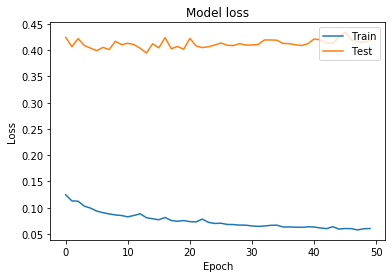

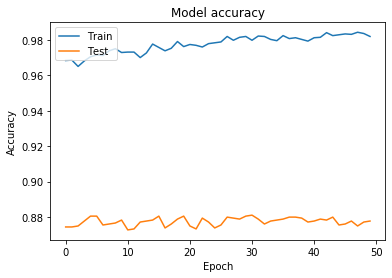

In [28]:
# Train your model and save it's history
history = model.fit(X_train, y_train, epochs = 50,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(history.history['loss'], history.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(history.history['acc'], history.history['val_acc'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


## Early stopping your model
The early stopping callback is useful since it allows for you to stop the model training if it no longer improves after a given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback parameter in the .fit() method.

The model you built to detect fake dollar bills is loaded for you to train, this time with early stopping. X_train, y_train, X_test and y_test are also available for you to use.

### init

In [30]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [31]:
#upload and download

from uploadfromdatacamp import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(X_train, y_train, X_test, y_test)
"""

tobedownloaded="""
{numpy.ndarray: {'X_test.csv': 'https://file.io/A9eTiX',
  'X_train.csv': 'https://file.io/wSe8NV',
  'y_test.csv': 'https://file.io/s4rYWQ',
  'y_train.csv': 'https://file.io/4VMwvv'}}
"""
prefix='data_from_datacamp/Chap1-Exercise3.2_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

from uploadfromdatacamp import loadNDArrayFromCsv
X_test = loadNDArrayFromCsv(prefix+'X_test.csv')
X_train = loadNDArrayFromCsv(prefix+'X_train.csv')
y_test = loadNDArrayFromCsv(prefix+'y_test.csv')
y_train = loadNDArrayFromCsv(prefix+'y_train.csv')



{numpy.ndarray: {"X_test.csv": "https://file.io/A9eTiX",
  "X_train.csv": "https://file.io/wSe8NV",
  "y_test.csv": "https://file.io/s4rYWQ",
  "y_train.csv": "https://file.io/4VMwvv"}}

{'numpy.ndarray': {'X_test.csv': 'https://file.io/A9eTiX', 'X_train.csv': 'https://file.io/wSe8NV', 'y_test.csv': 'https://file.io/s4rYWQ', 'y_train.csv': 'https://file.io/4VMwvv'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 32243    0 32243    0     0  18756      0 --:--:--  0:00:01 --:--:-- 18756
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Spe

### code

In [32]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', 
                       patience=5)

# Train your model using the early stopping callback
model.fit(X_train, y_train, 
           epochs=1000, validation_data=(X_test, y_test),
           callbacks=[monitor_val_acc])

Train on 960 samples, validate on 412 samples
Epoch 1/1000
960/960 [==============================] - 0s 384us/step - loss: 0.8912 - acc: 0.2833 - val_loss: 0.8444 - val_acc: 0.3374
Epoch 2/1000
960/960 [==============================] - 0s 42us/step - loss: 0.8185 - acc: 0.3604 - val_loss: 0.7795 - val_acc: 0.4248
Epoch 3/1000
960/960 [==============================] - 0s 36us/step - loss: 0.7582 - acc: 0.4688 - val_loss: 0.7255 - val_acc: 0.5170
Epoch 4/1000
960/960 [==============================] - 0s 34us/step - loss: 0.7078 - acc: 0.5396 - val_loss: 0.6801 - val_acc: 0.5631
Epoch 5/1000
960/960 [==============================] - 0s 36us/step - loss: 0.6652 - acc: 0.5990 - val_loss: 0.6416 - val_acc: 0.6044
Epoch 6/1000
960/960 [==============================] - 0s 34us/step - loss: 0.6288 - acc: 0.6323 - val_loss: 0.6085 - val_acc: 0.6311
Epoch 7/1000
960/960 [==============================] - 0s 34us/step - loss: 0.5973 - acc: 0.6552 - val_loss: 0.5798 - val_acc: 0.6481
Epoch 8/

## A combination of callbacks
Deep learning models can take a long time to train, especially when you move to deeper architectures and bigger datasets. Saving your model every time it improves as well as stopping it when it no longer does allows you to worry less about choosing the number of epochs to train for. You can also restore a saved model anytime.

The model training and validation data are available in your workspace as X_train, X_test, y_train, and y_test.

Use the EarlyStopping() and the ModelCheckpoint() callbacks so that you can go eat a jar of cookies while you leave your computer to work!

### code

In [33]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((960, 4), (960,), (412, 4), (412,))

In [34]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_acc', patience=3)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
history = model.fit(X_train, y_train,
                    epochs = 10000000,
                    callbacks = [monitor_val_acc, modelCheckpoint],
                    validation_data = (X_test, y_test))

Train on 960 samples, validate on 412 samples
Epoch 1/10000000
960/960 [==============================] - 0s 40us/step - loss: 0.2350 - acc: 0.9469 - val_loss: 0.2355 - val_acc: 0.9490
Epoch 2/10000000
960/960 [==============================] - 0s 42us/step - loss: 0.2323 - acc: 0.9469 - val_loss: 0.2329 - val_acc: 0.9490
Epoch 3/10000000
960/960 [==============================] - 0s 60us/step - loss: 0.2298 - acc: 0.9469 - val_loss: 0.2304 - val_acc: 0.9490
Epoch 4/10000000
960/960 [==============================] - 0s 37us/step - loss: 0.2273 - acc: 0.9490 - val_loss: 0.2280 - val_acc: 0.9515
Epoch 5/10000000
960/960 [==============================] - 0s 40us/step - loss: 0.2249 - acc: 0.9490 - val_loss: 0.2256 - val_acc: 0.9539
Epoch 6/10000000
960/960 [==============================] - 0s 36us/step - loss: 0.2226 - acc: 0.9490 - val_loss: 0.2233 - val_acc: 0.9539
Epoch 7/10000000
960/960 [==============================] - 0s 37us/step - loss: 0.2203 - acc: 0.9490 - val_loss: 0.2210